In [1]:
import pickle
import torch
import numpy as np
from helper_fns import taylor_softmax_v1
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
from tqdm.auto import tqdm

/home/hrenduchinta/LM-pretraining/ingenious-env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gains_file="/home/hrenduchinta/LM-pretraining/subsets/fl_bert_18_12_2022_06:36:35/gains_after_step_0.pkl"
with open(gains_file, "rb") as f:
    gains=pickle.load(f)

In [3]:
probs=[taylor_softmax_v1(torch.from_numpy(np.array([partition_gains]))).numpy()[0] for partition_gains in gains]

In [5]:
for g in probs[0]:
    print(g)

0.031251263857088506
0.012706980157581363
0.0021758404979908465
0.0014107368521867267
0.0012999667090792387
0.0012671434935395286
0.0012589259947066917
0.0011839610393882618
0.0010787021619687272
0.0009177734844338688
0.0005816525079541408
0.00043964524022963687
0.0003225640592196978
0.00024807834688517834
0.00023948702100742579
0.00023846713751689294
0.00023450454744165176
0.00022970925762389862
0.0002281135508771032
0.0002273013045062712
0.00016568136972560955
0.0001564303490538334
0.000156208236452628
0.00015413765062417874
0.00015324729991126799
0.00015060378025858124
0.00014981346272616324
0.00014838808828831733
0.00014829700678411475
0.0001482048882124643
0.0001479787275350758
0.00014742552118946397
0.00014545952100795414
0.00013479532165926097
0.0001122014200769524
0.00010540811081952016
9.875358054685025e-05
9.765509588001851e-05
9.60741582097193e-05
9.557431257858287e-05
9.250632872624322e-05
9.213465472343065e-05
9.051694496178895e-05
9.049635759197946e-05
8.983717209926205e-

In [8]:
sample=np.random.choice(list(range(len(probs[0]))), size=100000, replace=True, p=probs[0])

In [5]:
with open("gains.txt", "w") as f:
    for g in gains[0]:
        f.write(f"{g}\n")

In [4]:
with open("probs.txt", "w") as f:
    for p in probs[0]:
        f.write(f"{p}\n")

In [6]:
P=np.array(probs[0])
N=np.size(P)
ones=np.ones(N)
with open("jensenshannon.txt", "w") as f:
    for i in range(N):
        f.write(f"{jensenshannon(P[i:], (ones[i:]*(1/N-i)))}\n")

/home/hrenduchinta/LM-pretraining/ingenious-env/lib/python3.7/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


In [14]:
x=np.array(range(len(probs[0])))
y=np.array(probs[0])

(7.500000000000001e-09, 8e-09)

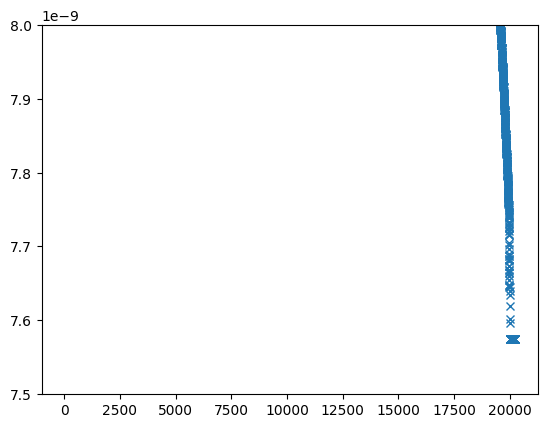

In [28]:
plt.plot(y[1264:], "x")
plt.ylim((0.75*1e-8, 0.80*1e-8))

In [23]:
for prob in probs[0]:
    print(prob)

0.9986144941554795
0.0005958611362238596
0.0003925076447699544
5.016555381356781e-05
3.26838979034551e-05
1.9961356926282855e-05
1.5117545140185105e-05
1.1319733717502277e-05
1.047540930998349e-05
7.493435112702384e-06
5.045783649213177e-06
4.778978113383299e-06
3.773869660569606e-06
3.592251728828398e-06
3.5213117101565634e-06
3.0860935137204444e-06
2.893064684786814e-06
2.6969286901562175e-06
2.3077616037933314e-06
2.0505846550129997e-06
1.4406160521993287e-06
1.368511327872643e-06
1.2611583220551256e-06
1.257013503709375e-06
1.1947676592443022e-06
1.1781702923948101e-06
9.82805822395728e-07
9.614804155157385e-07
9.128398935250338e-07
8.622876338140978e-07
6.879163043286012e-07
6.457822163334857e-07
5.804266807769959e-07
5.348387434292051e-07
5.309763848708733e-07
4.264662957530784e-07
4.187849345555998e-07
3.960632009286416e-07
3.6292187138771105e-07
3.611266998612759e-07
3.4905983198187096e-07
3.286323047598488e-07
3.227248424188644e-07
2.678741931547828e-07
2.6482651371353936e-07


In [1]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
X=np.load("/home/hrenduchinta/text-analysis/wikitext_representations_layer_9.npy")

In [3]:
Y=X[np.random.randint(0, np.shape(X)[0], 100000)]

In [4]:
Y.shape

(100000, 768)

In [16]:
sijs=rbf_kernel(Y, gamma=0.01)

In [17]:
l=sijs[23].tolist()
for i in sorted(l, reverse=True):
    print(i)

1.0
0.7479672431945801
0.7470422387123108
0.7399393320083618
0.7329855561256409
0.7305799722671509
0.7298452854156494
0.7296096086502075
0.7281587719917297
0.7273266911506653
0.7260332703590393
0.7259520292282104
0.7250848412513733
0.723834753036499
0.7230557799339294
0.7218168377876282
0.7206583619117737
0.71988844871521
0.7189964056015015
0.7186231017112732
0.7154356241226196
0.7153098583221436
0.7152262330055237
0.7147589325904846
0.7141387462615967
0.7141218781471252
0.7140072584152222
0.7122654318809509
0.7109876275062561
0.7109130620956421
0.710250973701477
0.7099960446357727
0.7089903354644775
0.7084617018699646
0.7072848081588745
0.7070850133895874
0.7067537307739258
0.7062610387802124
0.7054826021194458
0.7053561806678772
0.7052090764045715
0.7052090764045715
0.7050825357437134
0.7050291299819946
0.7049077749252319
0.7046657800674438
0.7045914530754089
0.7045648694038391
0.7044676542282104
0.7041769623756409
0.7036033272743225
0.7034822106361389
0.7034004330635071
0.7033579349